In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing as HWES
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("bmkg.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
df.index.freq = 'D'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2011-01-01 to 2024-10-31
Freq: D
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suhu         4808 non-null   float64
 1   Kelembaban   4808 non-null   float64
 2   Curah_Hujan  3478 non-null   float64
dtypes: float64(3)
memory usage: 157.9 KB


In [4]:
df.describe()

,Suhu,Kelembaban,Curah_Hujan
count,4808.000000,4808.000000,3478.000000
mean,27.362230,78.897671,1092.303910
std,1.231762,7.405878,2905.192928
min,23.100000,46.000000,0.000000
25%,26.500000,75.000000,0.000000
50%,27.300000,80.000000,2.800000
75%,28.200000,84.000000,20.600000
max,33.000000,98.000000,8888.000000


In [5]:
# Menghitung berapa kali angka 2 muncul di kolom tertentu, misalnya kolom 'nilai'
jumlah_angka_dua = (df['Curah_Hujan'] == 8888).sum()

# Menampilkan hasil
print(f'Jumlah null : {jumlah_angka_dua}')

Jumlah null : 424


In [6]:
# Mengganti nilai spesifik dengan 0 di kolom tertentu
nilai_spesifik = 8888  # Nilai yang ingin diubah
cols_to_replace = ['Curah_Hujan', 'Kelembaban', 'Suhu']  # Kolom target

for col in cols_to_replace:
    df[col] = df[col].replace(nilai_spesifik, 0)  # Mengganti nilai spesifik dengan 0

print(df)

            Suhu  Kelembaban  Curah_Hujan
Tanggal                                  
2011-01-01  25.2        89.0         22.0
2011-01-02  26.5        85.0          5.0
2011-01-03  26.8        86.0          5.0
2011-01-04  25.9        89.0         16.0
2011-01-05  26.5        85.0          0.0
...          ...         ...          ...
2024-10-27  27.5        75.0          0.0
2024-10-28  28.8        75.0          4.5
2024-10-29  28.3        75.0          0.0
2024-10-30  27.3        76.0          0.0
2024-10-31  27.7        74.0          0.0

[5053 rows x 3 columns]


In [7]:
# Mengisi data kosong dengan mean dari masing-masing kolom
cols_to_fill = ['Curah_Hujan', 'Kelembaban', 'Suhu']  # Kolom target

for col in cols_to_fill:
    mean_value = df[col].mean()  # Menghitung mean dari kolom
    df[col] = df[col].fillna(mean_value)  # Mengisi nilai kosong dengan mean

print(df)

            Suhu  Kelembaban  Curah_Hujan
Tanggal                                  
2011-01-01  25.2        89.0         22.0
2011-01-02  26.5        85.0          5.0
2011-01-03  26.8        86.0          5.0
2011-01-04  25.9        89.0         16.0
2011-01-05  26.5        85.0          0.0
...          ...         ...          ...
2024-10-27  27.5        75.0          0.0
2024-10-28  28.8        75.0          4.5
2024-10-29  28.3        75.0          0.0
2024-10-30  27.3        76.0          0.0
2024-10-31  27.7        74.0          0.0

[5053 rows x 3 columns]


In [8]:
df.describe()
#BMKG Setelah Imputasi

,Suhu,Kelembaban,Curah_Hujan
count,5053.000000,5053.000000,5053.000000
mean,27.362230,78.897671,8.775446
std,1.201523,7.224070,15.939607
min,23.100000,46.000000,0.000000
25%,26.600000,75.000000,0.000000
50%,27.362230,79.000000,6.500000
75%,28.100000,84.000000,8.775446
max,33.000000,98.000000,200.000000


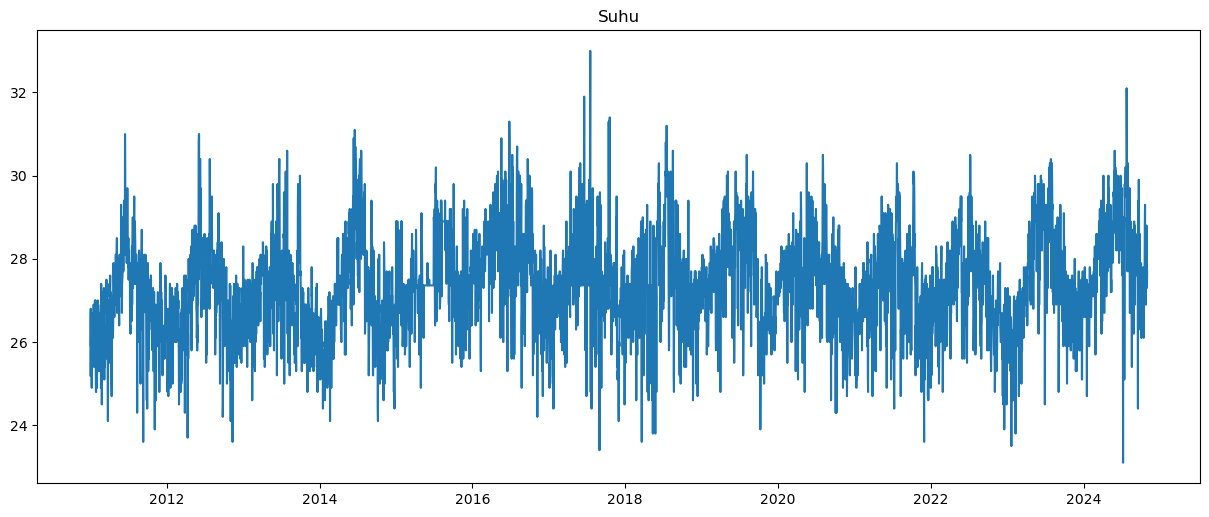

In [9]:
plt.figure(figsize=(15, 6), dpi=100)
plt.title('Suhu')
plt.plot(df['Suhu'])

In [8]:
df = df.drop(columns=['Curah_Hujan', 'Kelembaban'])
df

,Suhu
Tanggal,
2021-01-01,26.51
2021-01-02,26.40
2021-01-03,25.82
2021-01-04,25.57
2021-01-05,25.65
...,...
2024-07-27,28.78
2024-07-28,28.01
2024-07-29,27.41


In [9]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

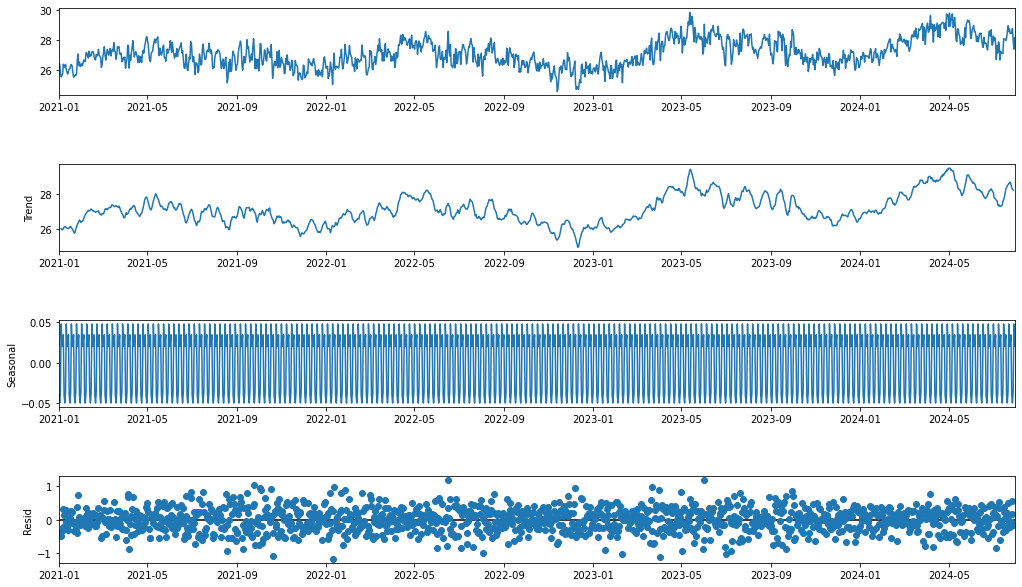

In [10]:
su_decompose = seasonal_decompose(df, model = "additive")
fig = su_decompose.plot()
fig.set_size_inches(16,9)
plt.show()

In [9]:
# Tentukan proporsi pembagian
train_size = int(len(df) * 0.9)

# Membagi data
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [10]:
train.tail()

,Suhu,Kelembaban,Curah_Hujan
Tanggal,,,
2023-06-09,29.1,67.0,0.000000
2023-06-10,28.7,70.0,0.000000
2023-06-11,30.0,61.0,0.000000
2023-06-12,29.4,61.0,0.000000
2023-06-13,29.9,56.0,8.775446


In [11]:
test

,Suhu,Kelembaban,Curah_Hujan
Tanggal,,,
2023-06-14,29.6,66.0,8.775446
2023-06-15,28.4,66.0,0.000000
2023-06-16,28.2,69.0,0.000000
2023-06-17,29.6,54.0,6.500000
2023-06-18,29.7,55.0,0.000000
...,...,...,...
2024-10-27,27.5,75.0,0.000000
2024-10-28,28.8,75.0,4.500000
2024-10-29,28.3,75.0,0.000000


In [12]:
hwmodel=ExponentialSmoothing(train.Suhu,trend='add', seasonal='add', seasonal_periods=365, 
                             damped_trend=True).fit()
print(hwmodel.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Suhu   No. Observations:                 4547
Model:             ExponentialSmoothing   SSE                           3437.308
Optimized:                         True   AIC                           -532.155
Trend:                         Additive   BIC                           1844.067
Seasonal:                      Additive   AICC                          -465.670
Seasonal Periods:                   365   Date:                 Sun, 22 Dec 2024
Box-Cox:                          False   Time:                         14:06:47
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.2948718                alpha                 True
smoothing_trend       

In [13]:
test_pred=hwmodel.forecast(506)

In [14]:
test_pred

2023-06-14    29.411733
2023-06-15    29.156124
2023-06-16    29.089152
2023-06-17    29.330355
2023-06-18    29.563246
                ...    
2024-10-27    27.718451
2024-10-28    28.028562
2024-10-29    27.719660
2024-10-30    27.522401
2024-10-31    27.408527
Freq: D, Length: 506, dtype: float64

<AxesSubplot:title={'center':'Suhu Spliting 80 : 20'}, xlabel='Tanggal'>

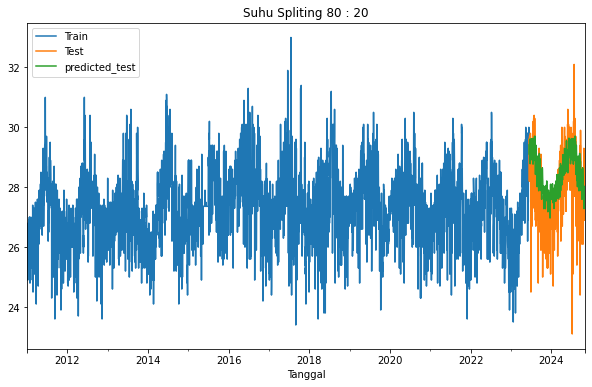

In [15]:
train['Suhu'].plot(legend=True, label='Train', figsize=(10,6))
test['Suhu'].plot(legend=True, label='Test')
plt.title('Suhu Spliting 80 : 20')
test_pred.plot(legend=True, label='predicted_test')

In [16]:
#Spliting data 90:10
# Calculate errors
errors = abs(test['Suhu'] - test_pred)
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 0.92
RMSE: 1.20


In [17]:
# Buat model Holt-Winters dengan parameter manual
hw_model = ExponentialSmoothing(
    df['Suhu'], 
    trend="add",            # Trend aditif
    seasonal="add",         # Seasonal aditif
    seasonal_periods=365     # Jumlah periode musiman (contoh: data bulanan)
)

# Fit model dengan parameter manual
fitted_model = hw_model.fit(
    smoothing_level=0.2948718,  # alpha
    smoothing_slope=4.2618e-09,  # beta
    smoothing_seasonal=1.0087e-07,  # gamma
    optimized=False  # Jangan optimalkan, gunakan parameter manual
)

C:\Users\USER\AppData\Local\Temp\ipykernel_23920\786571064.py:10: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = hw_model.fit(


In [18]:
# Hasil
print(fitted_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Suhu   No. Observations:                 5053
Model:             ExponentialSmoothing   SSE                           4524.248
Optimized:                        False   AIC                            179.488
Trend:                         Additive   BIC                           2588.223
Seasonal:                      Additive   AICC                           238.455
Seasonal Periods:                   365   Date:                 Sun, 22 Dec 2024
Box-Cox:                          False   Time:                         14:08:18
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.2948718                alpha                False
smoothing_trend       

In [19]:
# Prediksi ke depan
pred = fitted_model.forecast(steps=365)
print(pred)

2024-11-01    27.300895
2024-11-02    28.400915
2024-11-03    28.351717
2024-11-04    28.301285
2024-11-05    28.526058
                ...    
2025-10-27    27.859286
2025-10-28    28.375549
2025-10-29    28.485013
2025-10-30    27.284351
2025-10-31    27.434646
Freq: D, Length: 365, dtype: float64


In [20]:
# Simpan hasil prediksi ke dalam DataFrame (jika belum dalam DataFrame)
pred_df = pd.DataFrame({'Date': pred.index, 'Suhu': pred.values})

# Simpan ke file CSV
pred_df.to_csv('D:/cool/TA/data/HW suhu BMKG.csv', index=False)

In [21]:
historical_data = df['Suhu']

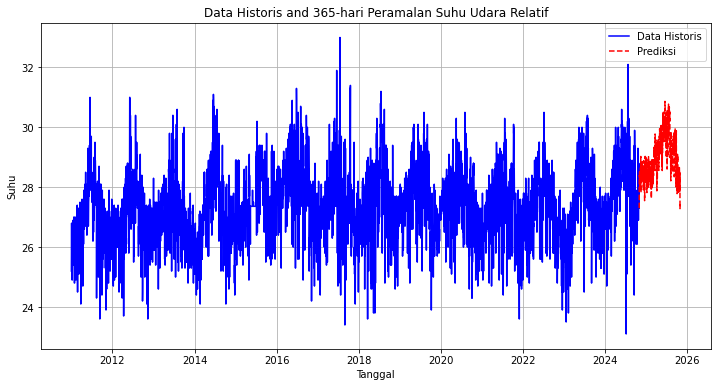

In [23]:
# Visualisasi
plt.figure(figsize=(12, 6))

# Plot data historis
plt.plot(historical_data.index, historical_data, label='Data Historis', color='blue')

# Plot prediksi
plt.plot(pred.index, pred.values, label='Prediksi', color='Red', linestyle='--')

# Tambahkan label dan judul
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.title('Data Historis and 365-hari Peramalan Suhu Udara Relatif')
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

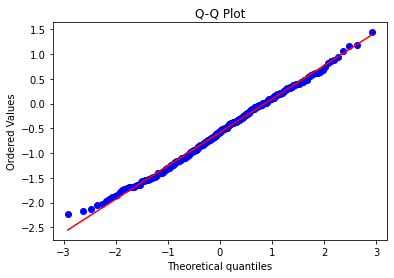

In [34]:
residual = (test['Suhu'] - test_pred)
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [35]:
import matplotlib.pyplot as plt
from scipy import stats

# Uji Shapiro-Wilk
stat, p_value = stats.shapiro(residual)
print('Statistik Shapiro-Wilk:', stat)
print('P-value:', p_value)

# Interpretasi
alpha = 0.05
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Ada cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistik Shapiro-Wilk: 0.9956057071685791
P-value: 0.33903270959854126
Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)


In [24]:
final_model=ExponentialSmoothing(df.Kelembaban,trend='add', seasonal='add', seasonal_periods=365).fit()

In [25]:
pred=final_model.forecast(365)

In [26]:
pred

2024-08-01    76.719967
2024-08-02    74.864042
2024-08-03    72.178651
2024-08-04    74.803549
2024-08-05    74.931971
                ...    
2025-07-27    74.854414
2025-07-28    77.148334
2025-07-29    76.164164
2025-07-30    74.664073
2025-07-31    76.069120
Freq: D, Length: 365, dtype: float64

<AxesSubplot:xlabel='Tanggal'>

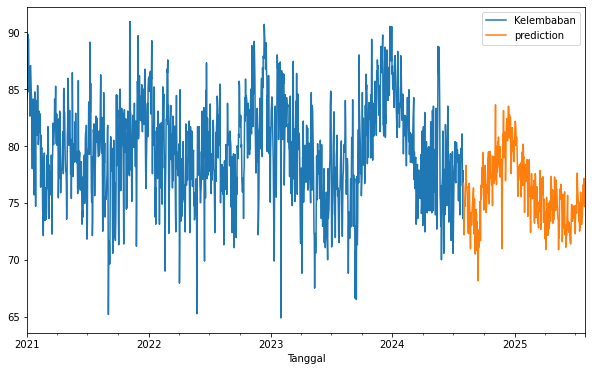

In [27]:
df['Kelembaban'].plot(legend=True, label='Kelembaban', figsize=(10,6))
pred.plot(legend=True, label='prediction')

In [ ]:
test_kl.plot(legend=True, label='Test')
test_kl.plot(legend=True, label='predicted_test')

In [56]:
model = HWES(train_kl, seasonal_periods = 365, trend = 'add', seasonal = "add")
fitted = model.fit()
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Kelembaban   No. Observations:                 1045
Model:             ExponentialSmoothing   SSE                           8028.560
Optimized:                         True   AIC                           2868.743
Trend:                         Additive   BIC                           4695.947
Seasonal:                      Additive   AICC                          3278.883
Seasonal Periods:                   365   Date:                 Tue, 13 Aug 2024
Box-Cox:                          False   Time:                         20:36:02
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.5524601                alpha                 True
smoothing_trend       

In [57]:
model = HWES(train_kl, seasonal_periods = 365, trend = 'add', seasonal = "mul")
fitted = model.fit(optimized=True, use_brute=True)
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Kelembaban   No. Observations:                 1045
Model:             ExponentialSmoothing   SSE                          10212.190
Optimized:                         True   AIC                           3120.146
Trend:                         Additive   BIC                           4947.350
Seasonal:                Multiplicative   AICC                          3530.285
Seasonal Periods:                   365   Date:                 Tue, 13 Aug 2024
Box-Cox:                          False   Time:                         20:36:15
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.5296300                alpha                 True
smoothing_trend       

D:\anaconda2\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [58]:
forecast = fitted.forecast(steps=12)

InvalidIndexError: (slice(None, None, None), None)

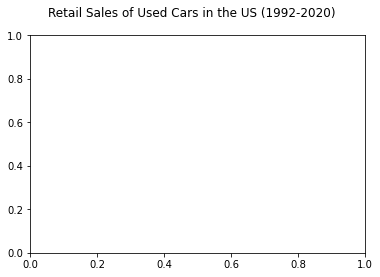

In [60]:
fig = plt.figure()
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(train_kl.index, train_kl, 'b.-', label='Sales History')
future, = plt.plot(test_kl.index, test_kl, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(test_kl.index, forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

InvalidIndexError: (slice(None, None, None), None)

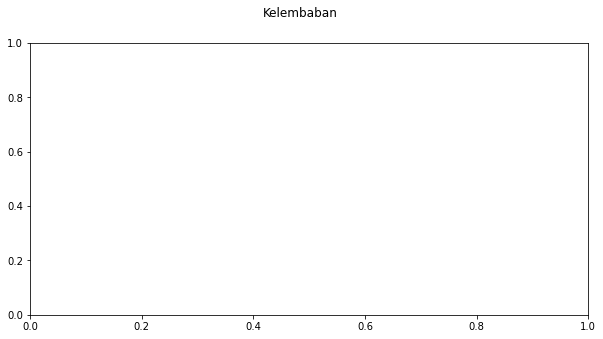

In [63]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Kelembaban') 
past, = plt.plot(train_kl.index, train_kl, 'b.-', label='train')
future, = plt.plot(test_kl.index, test_kl, 'r.-', label='test')
predicted_future, = plt.plot(test_kl.index, forecast, 'g.-', label='Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

NameError: name 'prediction_kl' is not defined

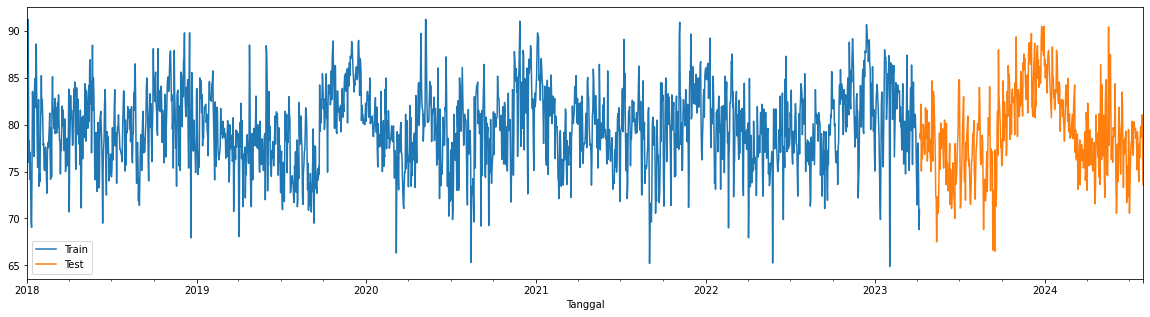

In [23]:
train_kl['Kelembaban'].plot(legend=True, label='Train', figsize=(20,5))
test_kl['Kelembaban'].plot(legend=True, label="Test")
prediction_kl.plot(legend=True,label='Prediction')
plt.title("Model Result",size=30)
plt.show()

In [ ]:
df=df.groupby('Tanggal').sum()

In [14]:
hwmodel_kl=ExponentialSmoothing(train.Kelembaban, trend='add', seasonal='mul', seasonal_periods=4).fit()

D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
test_pred=hwmodel_kl.forecast(300)

<AxesSubplot:xlabel='Tanggal'>

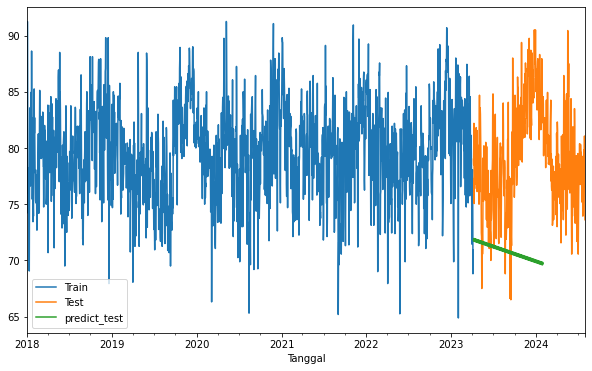

In [16]:
train['Kelembaban'].plot(legend=True, label='Train', figsize=(10,6))
test['Kelembaban'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='predict_test')

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
np.sqrt(mean_squared_error(test,test_pred))

ValueError: Found input variables with inconsistent numbers of samples: [481, 300]

In [83]:
ch = df.drop(columns=['Kelembaban','Suhu'])

<AxesSubplot:xlabel='Tanggal'>

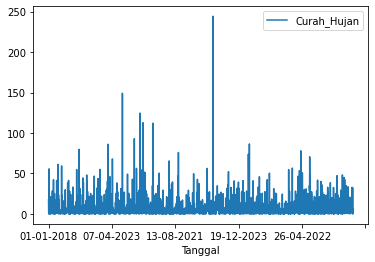

In [84]:
ch.plot()

In [85]:
# Tentukan proporsi pembagian
train_size = int(len(ch) * 0.8)

# Membagi data
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [86]:
train.tail()

,Curah_Hujan,Kelembaban,Suhu
Tanggal,,,
25-04-2018,14.80,75.75,30.26
25-04-2019,11.53,88.50,27.99
25-04-2020,5.29,81.25,29.31
25-04-2021,0.14,80.06,29.19
25-04-2022,7.14,77.75,29.91


In [99]:
hwmodel=ExponentialSmoothing(train.Curah_Hujan, trend='add', seasonal='add', seasonal_periods=4).fit()

D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557

In [92]:
test_pred=hwmodel.forecast(5)

NameError: name 'hwmodel' is not defined

In [93]:
decompose_result = seasonal_decompose(ch['Curah_Hujan'],model='multiplicative')

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [59]:
ch = ch.set_index('Tanggal')

Text(0, 0.5, 'Curah Hujan')

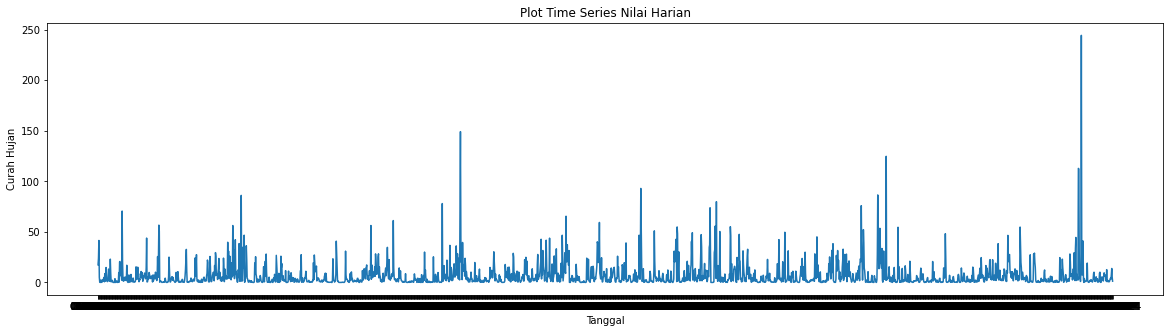

In [60]:
plt.figure(figsize=(20, 5))
plt.plot(ch.index,ch['Curah Hujan'])

# Menambahkan judul dan label
plt.title('Plot Time Series Nilai Harian')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan')

In [65]:
ch.sort_index(inplace = TRUE)

NameError: name 'TRUE' is not defined

In [47]:
from forecast import plot_components_x13
plot_components_x13(ch)
plt.show()

ModuleNotFoundError: No module named 'forecast'

In [63]:
decompose_result = seasonal_decompose(ch['Curah Hujan'], model = 'aditive')
decompose_result.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

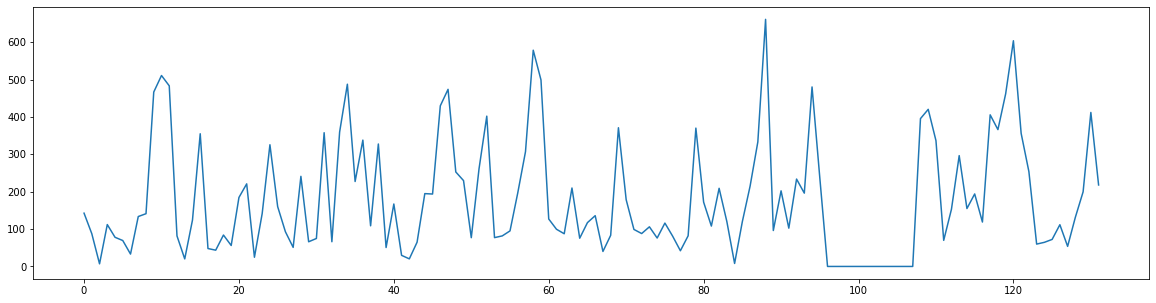

In [22]:
ch = ch['Curah Hujan'].plot(figsize=(20,5))
plt.show()

In [23]:
df_decompose = seasonal_decompose(df['SST'],model = "additive")
fig = df_decompose.plot()
fig.set_size_inches(16,9)
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

In [8]:
size = int(len(df)*0.8)
train_df = df[:size]
test_df = df[size:]

In [9]:
train_df.tail()

,SST
Tahun,
2010-08-01,880.24
2010-09-01,860.53
2010-10-01,896.96
2010-11-01,882.95
2010-12-01,919.93


NameError: name 'predictions_df' is not defined

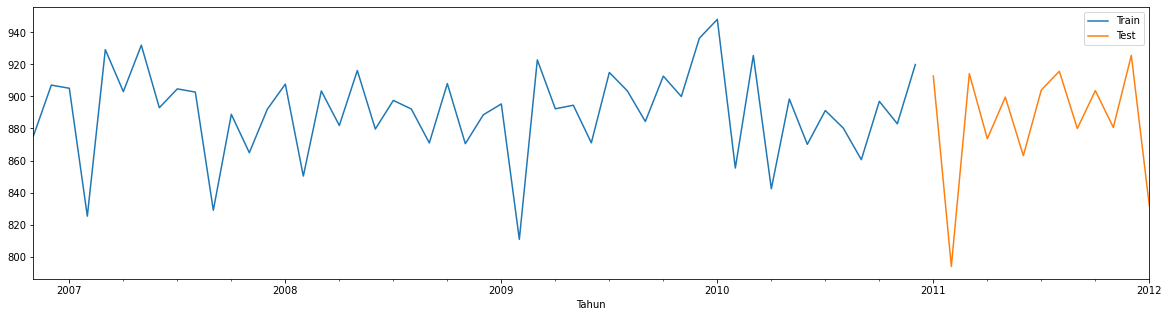

In [12]:
train_df['SST'].plot(legend=True, label="Train", figsize=(20,5))
test_df['SST'].plot(legend=True, label="Test")
predictions_df.plot(legend=True, label="Prediction")
plt.title("Model Result", size=20)
plt.show()

In [20]:
fitted_model = ExponentialSmoothing(train_df['SST'], trend='add', seasonal='add', seasonal_periods=12)
predictions_df = fitted_model.forecast(60)

AttributeError: 'ExponentialSmoothing' object has no attribute 'forecast'